<a href="https://colab.research.google.com/github/clarissafurtado7/GirlsInAIProject/blob/main/GirlsinAIProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Girls in AI Capstone Project
# Heart Attack Possibility Dataset
# Kathryn Ng, Clarissa Furtado, Jace Wai

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#get data, print 1st 10 rows
df = pd.read_csv("/content/heart.csv", sep=",")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
#null values in dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#values in target column
count = df.target.value_counts()
print(count)
print()
print(df.groupby('target').size())

1    165
0    138
Name: target, dtype: int64

target
0    138
1    165
dtype: int64


Text(0, 0.5, 'Count')

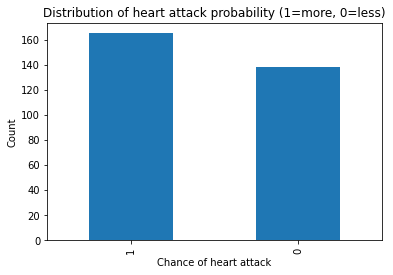

In [ ]:
#bar graph of heart attack possiblity
count.plot(kind='bar')
plt.title("Distribution of heart attack probability (1=more, 0=less)")
plt.xlabel("Chance of heart attack")
plt.ylabel("Count")

In [ ]:
#target variable
y_target = df['target']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:, 0:5]
X = pd.get_dummies(X)
y = df.iloc[:,-1]

bestfeatures = SelectKBest(chi2, k=5)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Selected_columns', 'Score_MutualInfo']
print(featureScores.nlargest(5,'Score_MutualInfo'))

  Selected_columns  Score_MutualInfo
2               cp         62.598098
4             chol         23.936394
0              age         23.286624
3         trestbps         14.823925
1              sex          7.576835


In [ ]:
features = ['cp', 'chol', 'age', 'trestbps']

In [ ]:
X_feature = df[features]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test, = train_test_split(X_feature, y_target, test_size = 0.20, random_state=24)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression();

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100)

Accuracy score using Logistic Regression: 85.24590163934425


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[24,  5],
       [ 4, 28]])

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy score: ", accuracy_score(y_test, y_pred)) 
print("Classification report: \n", classification_report(y_test, y_pred))

Accuracy score:  0.8524590163934426
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

